In [2]:
# data importing
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Fashion MNIST, Zalando'nun ürün resimlerinden oluşturulmuş bir veri setidir. Bu veri seti, MNIST veri setinin bir alternatifi olarak geliştirilmiştir ve 10 farklı kategoriye ait 70,000 adet gri tonlamalı moda ürünü görüntüsünü içerir. Her görüntü 28x28 piksel boyutunda olup, giysi, ayakkabı, çanta gibi sınıflardan oluşur. Eğitim için 60,000, test için ise 10,000 görüntü bulunur. Fashion MNIST, özellikle makine öğrenmesi ve derin öğrenme modellerini test etmek için yaygın olarak kullanılır ve MNIST'in zorluk derecesini artırmak amacıyla geliştirilmiştir.

In [3]:
# mnist veri setini yükleme
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizasyon
x_train, x_test = x_train / 255.0, x_test / 255.0

# Model oluşturma
model = models.Sequential([ #Sequential, Keras kütüphanesinde bulunan bir model oluşturma aracıdır
    layers.Flatten(input_shape=(28,28)),  # Giriş katmanı

    layers.Dense(128, activation='relu'), # Gizli katman

    #Aktivasyon fonksiyonları, yapay sinir ağlarında kullanılan bir tür matematiksel fonksiyonlardır
    #   Sigmoid fonksiyonu, çıkışı 0 ile 1 arasında olan ve girişlerin normalize edilmiş olması gereken bir aktivasyon fonksiyonudur.
    #   Tanh (Hiperbolik Tanjant): Tanh fonksiyonu, çıkışı -1 ile 1 arasında olan ve girişlerin normalize edilmiş olması gereken bir aktivasyon fonksiyonudur. Sigmoid fonksiyonuna benzerdir, ancak çıkış aralığı daha geniştir.
    #   Softmax fonksiyonu, çoklu sınıflandırma problemlerinde kullanılan bir aktivasyon fonksiyonudur. Çıkışı olasılık dağılımına dönüştürür, böylece çıkışlar birbirlerine göre yüzdelik olarak yorumlanabilir.
    #   Leaky ReLU, ReLU'nun genelleştirilmiş bir versiyonudur. ReLU'nun sıfır olan kısmı yerine küçük bir eğimle negatif girişlerin geçmesine izin verir.

    layers.Dense(128, activation='relu'), # Gizli katman
    # LeakyReLU(alpha=0.01),  # alpha, negatif kısımlar için eğim parametresini belirtir
    layers.Dense(128, activation='relu'), # Gizli katman

    layers.Dropout(0.2),                  # Aşırı uyumu önlemek için Dropout katmanı
    layers.Dense(10, activation='softmax') # Çıkış katmanı
])

# Modeli derleme
# Optimizer, derin öğrenme modelinin eğitim sırasında ağırlıklarını ve parametrelerini güncellemek için kullanılan bir algoritmadır
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


c:\Users\Sabri\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# model eğitimi
model.fit(x_train,y_train,batch_size=32,epochs=7,validation_data=(x_test,y_test))
# Epoch, eğitim veri kümesinin tamamının model tarafından bir kez geçirilmesidir. Yani, bir epoch, modelin tüm eğitim verisini gördüğü ve güncellendiği bir iterasyon sürecidir. Örneğin, 1 epoch, modelin tüm eğitim verisini bir kez gördüğü süreci ifade eder.
# Batch size, eğitim veri kümesinin küçük parçalara (batch'ler) bölünmesidir. Her bir batch, modelin bir güncelleme yapmak için kullandığı bir veri kümesi parçasıdır.
# validation_data, eğitim veri kümesinin yanı sıra ayrı bir doğrulama veri kümesini de kabul eder. Bu doğrulama veri kümesi, modelin eğitim sırasında görmediği verilere dayanarak performansını değerlendirmek için kullanılır.

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7580 - loss: 0.6750 - val_accuracy: 0.8211 - val_loss: 0.4767
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8587 - loss: 0.3882 - val_accuracy: 0.8607 - val_loss: 0.3846
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8718 - loss: 0.3450 - val_accuracy: 0.8602 - val_loss: 0.3807
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8824 - loss: 0.3190 - val_accuracy: 0.8700 - val_loss: 0.3573
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8890 - loss: 0.2985 - val_accuracy: 0.8656 - val_loss: 0.3609
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8962 - loss: 0.2795 - val_accuracy: 0.8736 - val_loss: 0.3505
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8978 - loss: 0.2738 - val_accuracy: 0.8795 - val_loss: 0.3352


In [5]:
# test_loss ve test_accuracy değişkenleri, modelinizin test veri kümesi üzerinde elde ettiği kayıp (loss) ve doğruluk (accuracy) değerlerini içerir.
test_loss,test_acuracy=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8778 - loss: 0.3321


In [6]:
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acuracy)

Test Loss: 0.33516302704811096
Test Accuracy: 0.8794999718666077


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


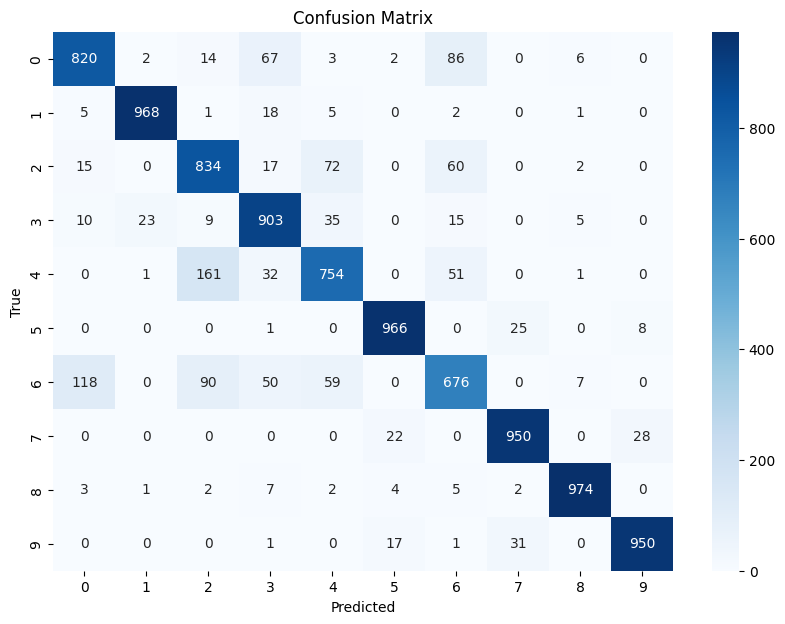

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.75      0.83      0.79      1000
           3       0.82      0.90      0.86      1000
           4       0.81      0.75      0.78      1000
           5       0.96      0.97      0.96      1000
           6       0.75      0.68      0.71      1000
           7       0.94      0.95      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [7]:
from sklearn.metrics import confusion_matrix ,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Tahminleri yap
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)  # Sınıf etiketlerini al

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred_classes)

# Görselleştir
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_pred_classes)
print(report)